## Assignment 9

#### 1.复习上课内容。

#### 2.回答以下理论问题。

2.1 简述skip-gram和cbow的区别 ?

+ cbow是用周围词预测中心词，从而利用中心词的预测结果情况
+ skip-gram是用中心词来预测周围的词


2.2 缺少预料的情况下skip-gram和cbow哪个模型训练效果会更好？ 为什么？

当数据量较少时候，优先选择skip-gram，相比cbow会有更多的样本可以训练

2.3 negative sampling怎么减少训练的时间复杂度？

本来有V个词来预测一个词，负采样从其它V-1个词挑选K个词当作负样本，变成利用这一个正例和k个负例来进行训练

2.4 Glove的基本想法是什么？

glove考虑全局语义的相关性，通过概率之间的比值来反应词之间的相关性，相关的话比值会大一些。基于全局语料库、并结合上下文语境构建词向量，结合了LSA和word2vec的优点

2.5 本节课所学的skip-gram, cbow 和glove 词向量有什么缺点 ？

这些方法得到的词向量是固定表征的，无法解决一词多义问题

#### 3.实践题

在本题，需要你利用gensim库训练文本的词向量并对一些词进行可视化展示所学词向量能反应语意信息。

数据下载地址：https://dumps.wikimedia.org/zhwiki/20200301/zhwiki-20200301-pages-articles-multistream.xml.bz2

你需要用维基百科提供的extractor来提取数据：https://github.com/attardi/wikiextractor

你可能需要参考gensim的文档：https://radimrehurek.com/gensim/models/word2vec.html

你可能需要使用t-sne做可视化：https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

### 提取wiki数据
python WikiExtractor.py -o extracted zhwiki-20200301-pages-articles-multistream.xml.bz2

### 数据预处理

In [8]:
# 提取出的语料中繁简混杂，使用opencc将繁体部分也转换为简体
import os
data_path = "./datasets/wikiextractor/extracted"
commands = []
filename_jian_list = []
for root, dirs, files in os.walk(data_path):
    for filename in files:
        input_filename = root + '/' + filename
        output_filename = root + '/' + filename + '_jian'
        commands.append("opencc -i {0} -o {1} -c t2s.json".format(input_filename,output_filename))
        filename_jian_list.append(output_filename)
# 写入命令到comds.sh在终端执行
f = open('comds.sh', 'w')
for line in commands:
    f.write(line)
    f.write('\n')
f.close()

In [37]:
import re
# 定义去掉空格换行符的函数
def token(raw_html):
#     使用正则去掉每个文件开头的标签
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', raw_html)
    return re.findall(r'[\d|\w]+',cleantext)

# 定义读取停用词文件的函数
def read_stopwords(path):
    lines = set()
    with open(path, mode='r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            lines.add(line)
    return lines
# 移除停用词
STOP_WORDS = read_stopwords("./datasets/stop_words.txt")

In [49]:
# 用jieba进行分词 并存储句子到sentences
import jieba
sentences = []
for file_path in filename_jian_list:
    for line in open(file_path):
        raw_data = line.strip()
        # 去掉开头的<>和空格换行符
        data = token(raw_data)
        data = ' '.join(data)
        if data == '':
            continue
        # jieba.lcut 直接生成的就是一个list
        word_seq = jieba.lcut(data.strip())
        # 移除停用词
        seg_list = [word for word in word_seq if word.strip() not in STOP_WORDS]
        sentences.append(seg_list)

In [51]:
new_sentences = [' '.join(n) for n in sentences]

In [54]:
f = open('./datasets/sentences_data.text', 'w')
for line in new_sentences:
    f.write(line)
    f.write('\n')
f.close()

In [52]:
# 查看分词后的结果
new_sentences[:10]

['腐殖质',
 '腐殖质 土壤 特异 有机质 土壤 有机质 组成部分 约 占 有机质 总量 50 65',
 '腐殖质 一种 分子 抗 分解 性强 棕色 或暗 棕色 无定形 胶体 动植物 残体 植物 组织 枯枝 落叶 动物 排泄物 皮毛 尸体 微生物 分解 转化 合成 一类 有机 高分子 化合物',
 '胡敏酸 富里 酸 含量 比例 土壤 而异 整体 黑色 褐色 无 定型 适度 粘结性 使 粘土 疏松 粘土 粘结 团粒结构 胶结剂',
 '养分 生物 循环 中 生物 死亡 后 生物 残 体会 矿物 化 过程 转化成 矿质 养分 生物 残体 会 矿物 化 生物 残 体会 腐殖 化 过程 腐殖质 形式 保留 养分 生物 循环 中 生物 残体 转化成 矿质 养分 一个 养分 储藏室 腐殖质 最终 会 矿物 化 过程 转化成 矿质 养分 腐殖质 雨水 冲走 泥土 上 矿质 养分 时 微生物 未能 分解 生物 残体 补充 微生物 分解 生物 残体 时间 很 慢 腐殖质 土壤 养分 浓度 释出 养分 补充 肥力 作用',
 '土壤 腐殖质 碳 氢 氧 氮 硫 磷 营养元素 元素 含量 看 胡敏酸 含碳 氮 硫较 富里 酸 高 氧 含量 较富里 酸 低 腐殖质 中 含氮 组分 形态 蛋白质 N 肽 N 氨基酸 N NH3 N 嘌呤 嘧啶 杂环 结构 上 N 环境 条件 下 腐殖质 含氮 差异 热带 土壤 中有 酸性 氨基酸 北极 土壤 中 这类 氨基酸 含量 低 热带 土壤 含 碱性 氨基酸 土壤 少',
 '实验 观察 土壤 中 氨基酸 细菌 氨基酸 土壤 蛋白质 肽 蛋白质 起源于 微生物',
 '腐殖质 非常复杂 生化 过程 3 种 学说',
 '土壤 保存 生物 残体 腐殖 化 养分 外 胶体 物质 特色 去 吸收 植物 缺少 阳离子 如钾 钙 镁',
 '阳离子 中铁 离子 腐殖质 土壤 颜色 染色 物质 土壤 颜色 去 分析 土壤 阳离子 成分']

训练文本的词向量

In [61]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import multiprocessing
import sys
# 采用skip-gram算法
sentence_path = './datasets/sentences_data.text'
model = Word2Vec(sg=1, sentences=LineSentence(sentence_path),
                               size=200,
                               window=5,
                               min_count=10,
                               workers=multiprocessing.cpu_count())
# 以该方式保存的模型可以在读取后进行再训练（追加训练），因为保存了训练的全部信息
model.save("./datasets/model/word2vec_gensim")
# 保存词向量文件
model.wv.save_word2vec_format("./datasets/model/word2vec_org",
                              "./datasets/model/vocabulary",
                              binary=False)

In [59]:
model.save("./datasets/model/word2vec_gensim")

In [60]:
model.wv.save_word2vec_format("./datasets/model/word2vec_org",
                              "./datasets/model/vocabulary",
                              binary=False)

In [21]:
# 可视化
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random
 
#因为词向量文件比较大 随机抽取一些词可视化
words = list(model.wv.vocab)
random.shuffle(words)

# 设置需要可视化词的数目
num = 300
rand_words = words[:num]

vector = model[rand_words]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [22]:
tsne = TSNE(n_components=2,init='pca',verbose=1)

In [23]:
embedd = tsne.fit_transform(vector)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.004s...
[t-SNE] Computed neighbors for 300 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 1.030314
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.346222
[t-SNE] KL divergence after 1000 iterations: 0.981069


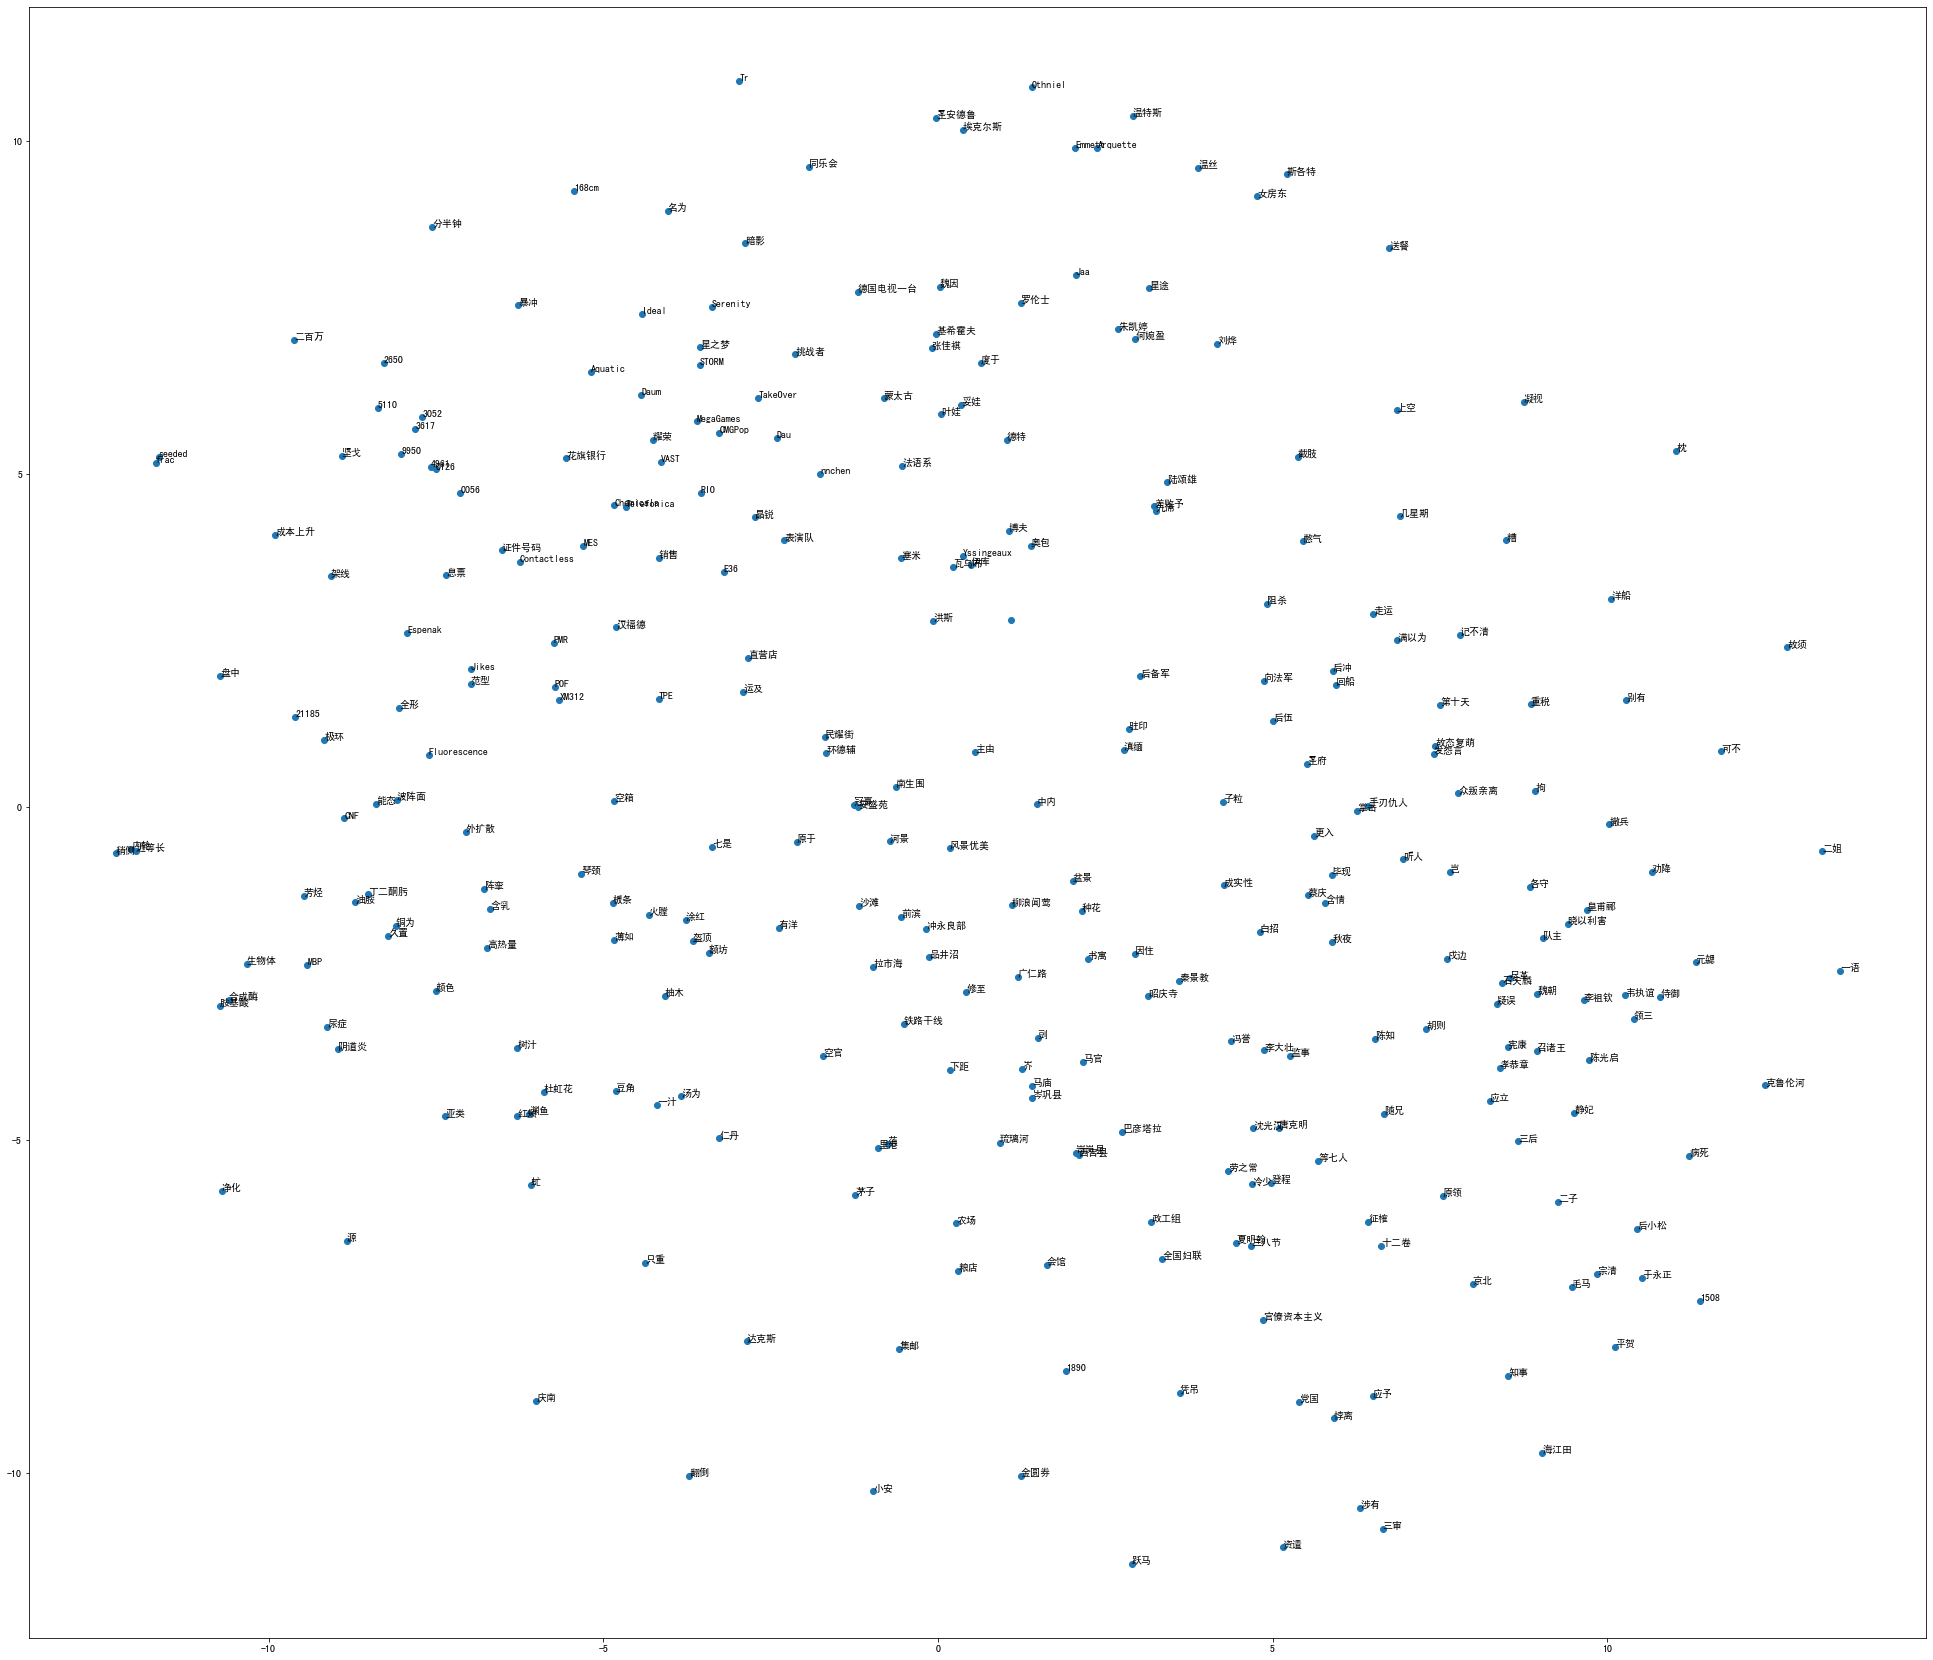

In [25]:
#可视化
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(34,30))
plt.scatter(embedd[:num,0], embedd[:num,1])
 
for i in range(num):
    x = embedd[i][0]
    y = embedd[i][1]
    plt.text(x, y, words[i])
plt.show()

#### 例子
尿道和尿道炎两个词位置比较接近